# Loading the data and displaying basic info

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
laptops = pd.read_csv('../Data/flipkart_laptops_full.csv')

In [3]:
laptops.shape

(984, 31)

In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model Name            951 non-null    object 
 1   Type                  983 non-null    object 
 2   Processor Brand       983 non-null    object 
 3   Processor Name        983 non-null    object 
 4   Processor Generation  591 non-null    object 
 5   RAM                   983 non-null    object 
 6   RAM Type              983 non-null    object 
 7   Storage Type          983 non-null    object 
 8   Storage Capacity      0 non-null      float64
 9   Graphic Processor     922 non-null    object 
 10  Screen Size           983 non-null    object 
 11  Screen Resolution     983 non-null    object 
 12  Screen Type           905 non-null    object 
 13  Weight                915 non-null    object 
 14  Dimensions            845 non-null    object 
 15  USB Port              8

# Cleaning the data

**Renaming column names**

In [5]:
laptops.columns = laptops.columns.str.replace(' ','_')

**Storage_Capacity has all null values. Hence dropping this column**

In [6]:
laptops['Storage_Capacity'].isnull().sum() # All 984 rows are empty

984

In [7]:
laptops.drop(columns='Storage_Capacity', inplace=True)

**Dropping rows where Laptop_Name, Type or  Processor_Brand is empty**

In [8]:
laptops[['Laptop_Name', 'Type', 'Processor_Brand']].isnull().sum()

Laptop_Name        1
Type               1
Processor_Brand    1
dtype: int64

In [9]:
laptops = laptops.dropna(subset=['Laptop_Name', 'Type', 'Processor_Brand'])

In [10]:
laptops[['Laptop_Name', 'Type', 'Processor_Brand']].isnull().sum()

Laptop_Name        0
Type               0
Processor_Brand    0
dtype: int64

**Checking if any rows present with all NaN values**

In [11]:
laptops[laptops.isna().all(axis=1)] # No empty rows found

,Model_Name,Type,Processor_Brand,Processor_Name,Processor_Generation,RAM,RAM_Type,Storage_Type,Graphic_Processor,Screen_Size,...,Web_Camera,Backlit_Keyboard,Warranty_Summary,Laptop_Name,Rating,Rating/Review_Count,Final_price,MRP,Discount,Product_URL


**Checking if any columns present with all NaN values**

In [12]:
laptops.isnull().all() # No columns with all Null values

Model_Name              False
Type                    False
Processor_Brand         False
Processor_Name          False
Processor_Generation    False
RAM                     False
RAM_Type                False
Storage_Type            False
Graphic_Processor       False
Screen_Size             False
Screen_Resolution       False
Screen_Type             False
Weight                  False
Dimensions              False
USB_Port                False
HDMI_Port               False
Wireless_LAN            False
Bluetooth               False
Battery_Cell            False
Battery_Backup          False
Web_Camera              False
Backlit_Keyboard        False
Warranty_Summary        False
Laptop_Name             False
Rating                  False
Rating/Review_Count     False
Final_price             False
MRP                     False
Discount                False
Product_URL             False
dtype: bool

In [13]:
laptops.shape

(983, 30)

**Replacing NaN in Rating column with median

In [14]:
laptops['Rating'].isna().sum() # 1 row has NaN Rating

1

In [15]:
laptops[laptops['Rating'].isna()] # it is the row with index 961

,Model_Name,Type,Processor_Brand,Processor_Name,Processor_Generation,RAM,RAM_Type,Storage_Type,Graphic_Processor,Screen_Size,...,Web_Camera,Backlit_Keyboard,Warranty_Summary,Laptop_Name,Rating,Rating/Review_Count,Final_price,MRP,Discount,Product_URL
961,V 1 4,Thin and Light Laptop,Intel,Core i3,12th Gen,16 GB,DDR4,SSD,Intel Integrated UHD Graphics,35.56 cm (14 inch),...,720p HD camera,No,1 Year Accidentaly Damage Protection + Onsite,Lenovo V 14 (2025) Intel Core i3 12th Gen 1215...,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/lenovo-v-14-2025-inte...


In [16]:
laptops['Rating'] =laptops['Rating'].fillna(laptops['Rating'].median())

In [17]:
laptops.loc[961]['Rating']

4.2

**Replacing NaN in Columns that are purely text-based (Categorical) with 'Unknown'**

In [18]:
cat_cols = ["Model_Name", "Processor_Generation", "Graphic_Processor", "Screen_Type",
            "Battery_Backup", "Web_Camera", "Backlit_Keyboard", "Battery_Cell", "Warranty_Summary"]
laptops[cat_cols] = laptops[cat_cols].fillna("Unknown")

**Replacing NaN in Specification Columns with most Common Value**

In [19]:
spec_cols = ["Screen_Size", "Weight", "Dimensions", "USB_Port", "HDMI_Port", "Wireless_LAN"]
for col in spec_cols:
    laptops[col] = laptops[col].fillna(laptops[col].mode()[0])  # Fill with most frequent value

**Cleaning price and discount columns**

In [20]:
laptops[['MRP','Final_price','Discount']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 983
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MRP          870 non-null    object
 1   Final_price  981 non-null    object
 2   Discount     870 non-null    object
dtypes: object(3)
memory usage: 63.0+ KB


In [21]:
laptops[['MRP','Final_price','Discount']].head()

,MRP,Final_price,Discount
0,"49,999","27,990",44% off
1,"44,990","27,990",37% off
2,"82,789","56,990",31% off
3,"63,000","41,990",33% off
4,"75,990","49,990",34% off


- In MRP and Final price columns,
  - replacing "," with ""
  - replacing null values with 0
  - converting to int type

In [22]:
laptops['MRP'] = laptops['MRP'].str.replace(',','').astype(float).fillna(0).astype(int)
laptops['Final_price'] = laptops['Final_price'].str.replace(',','').astype(float).fillna(0).astype(int)

- In Discount column,
  - extracting percentage value
  - converting to float type
  - replacing null values with 0

In [23]:
laptops['Discount'] = laptops['Discount'].str.extract(r"(\d+)").astype(float).fillna(0)

In [24]:
laptops[['Ratings_count','Reviews_count']] = laptops['Rating/Review_Count'].str.split('&',expand=True).rename(columns={0:'Ratings_count',1:'Reviews_count'})

In [25]:
laptops['Ratings_count'] =laptops['Ratings_count'].str.replace(r'[^0-9]','',regex=True).astype(float).fillna(0).astype(int)
laptops['Reviews_count'] = laptops['Reviews_count'].str.replace(r'[^0-9]','',regex=True).astype(float).fillna(0).astype(int)
laptops.drop(columns='Rating/Review_Count',inplace=True)

In [26]:
laptops[['Ratings_count','Reviews_count']].head()

,Ratings_count,Reviews_count
0,1025,93
1,305,51
2,5022,441
3,363,23
4,4,2


In [27]:
laptops.isnull().sum() # handled all NaN values

Model_Name              0
Type                    0
Processor_Brand         0
Processor_Name          0
Processor_Generation    0
RAM                     0
RAM_Type                0
Storage_Type            0
Graphic_Processor       0
Screen_Size             0
Screen_Resolution       0
Screen_Type             0
Weight                  0
Dimensions              0
USB_Port                0
HDMI_Port               0
Wireless_LAN            0
Bluetooth               0
Battery_Cell            0
Battery_Backup          0
Web_Camera              0
Backlit_Keyboard        0
Warranty_Summary        0
Laptop_Name             0
Rating                  0
Final_price             0
MRP                     0
Discount                0
Product_URL             0
Ratings_count           0
Reviews_count           0
dtype: int64

In [134]:
# Adding Brand_Name column
laptops['Brand_Name'] = laptops['Laptop_Name'].str.split().str[0]

In [135]:
# Changing Screen_Size to lower case
laptops['Screen_Size'] = laptops['Screen_Size'].str.lower()

# Exploratory Data Analysis

## General Overview

### How many unique laptop models are available?

In [30]:
unique_laptop_model_count = laptops['Model_Name'].nunique()
print(f"There are {unique_laptop_model_count} unique laptop models in this data set.")

There are 535 unique laptop models in this data set.


### Which are the top 10 most common laptop models?

In [31]:
top_ten_models = laptops['Model_Name'].value_counts()
top_ten_models = top_ten_models[top_ten_models.index!='Unknown'].sort_values(ascending=False).head(10)

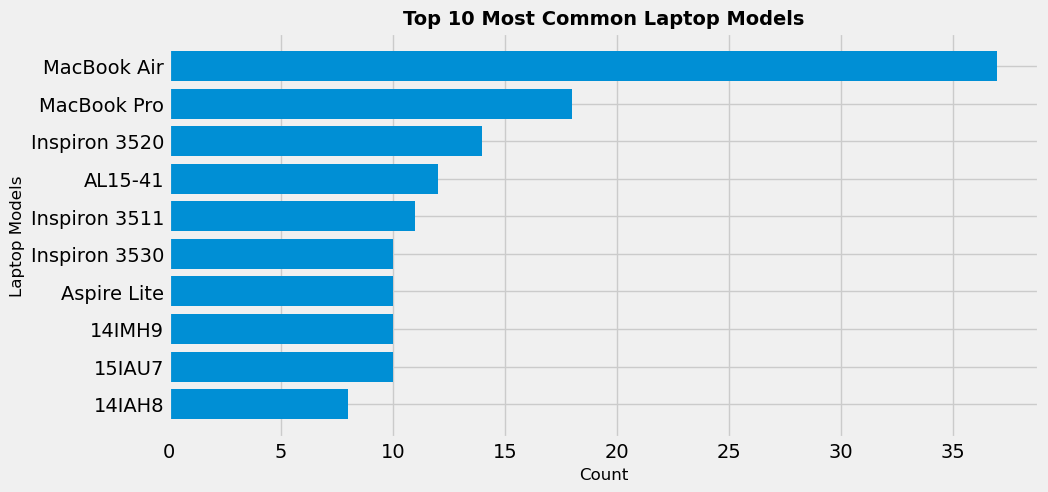

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.barh(top_ten_models.index,top_ten_models.values)
plt.gca().invert_yaxis()
plt.title('Top 10 Most Common Laptop Models',fontsize=14, fontweight='bold')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Laptop Models',fontsize=12)
plt.show()

**MacBook Air dominates the listings, suggesting strong availability or demand. Dell Inspiron models also appear frequently, indicating a wide range of configurations available for consumers.**

### What are the most common laptop brands on Flipkart?

In [33]:
top_five_brands = laptops['Brand_Name'].value_counts().nlargest(5)

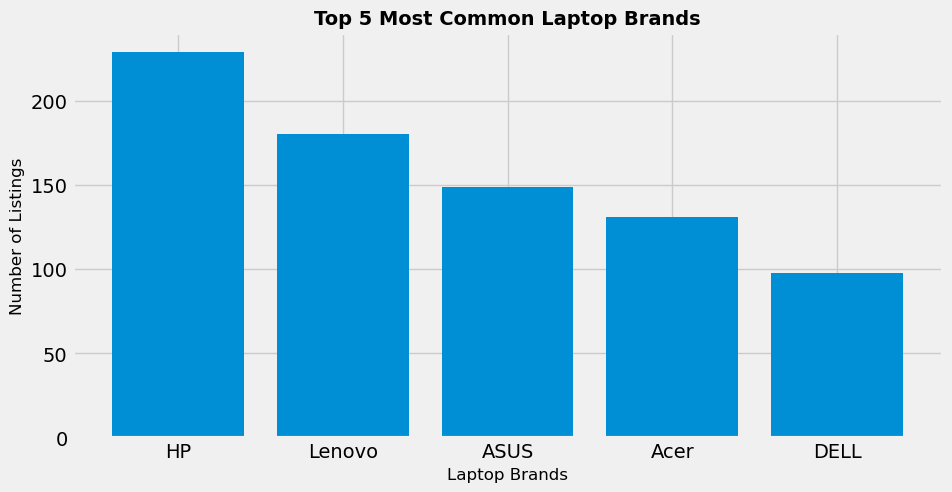

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.bar(top_five_brands.index,top_five_brands.values)
plt.title('Top 5 Most Common Laptop Brands',fontsize=14, fontweight='bold')
plt.ylabel('Number of Listings',fontsize=12)
plt.xlabel('Laptop Brands',fontsize=12)
plt.show()

- HP dominates the Flipkart listings, having the highest number of laptops available.
- Lenovo and ASUS follow closely, suggesting they have a strong market presence.
- Acer and Dell also have a significant number of listings, making up the top 5.
- This indicates that HP, Lenovo, and ASUS are the most actively marketed brands on Flipkart.

### Which brands dominate the listings (Intel vs AMD processors)?

In [35]:
laptops['Processor_Brand'].value_counts() # overall distribution of all processor brands across all listings.

Processor_Brand
Intel         688
AMD           225
Apple          55
MediaTek        7
Snapdragon      7
Qualcomm        1
Name: count, dtype: int64

In [36]:
# the distribution of processor brands within each laptop brand.
brand_processor_counts  = laptops.groupby(by=['Brand_Name','Processor_Brand']).size().unstack().fillna(0).astype(int)
brand_processor_counts = brand_processor_counts.loc[brand_processor_counts.sum(axis=1).sort_values(ascending=False).index]

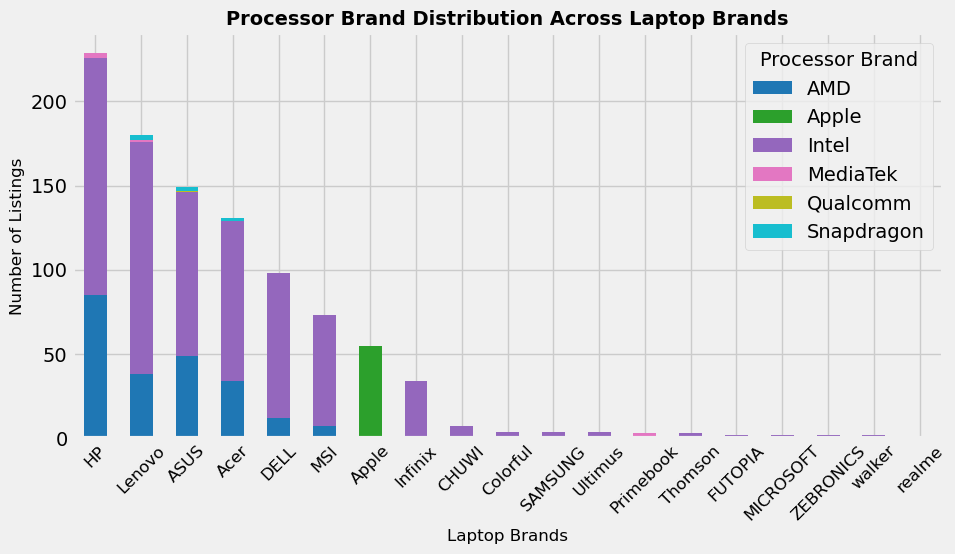

In [37]:
plt.style.use('fivethirtyeight')
brand_processor_counts.plot(kind='bar',stacked=True,figsize=(10,5),colormap='tab10')
plt.title('Processor Brand Distribution Across Laptop Brands', fontsize=14, fontweight='bold')
plt.xlabel('Laptop Brands', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title='Processor Brand')

- HP and Lenovo primarily list Intel and AMD processors, while Apple exclusively uses Apple chips.
- MediaTek and Snapdragon are found in a few listings, mostly from lesser-known brands.

### What are the most popular RAM & storage configurations?

In [38]:
top_five_ram = laptops['RAM'].value_counts().sort_values(ascending=False).head()
top_five_storage_type = laptops['Storage_Type'].value_counts().sort_values(ascending=False).head()

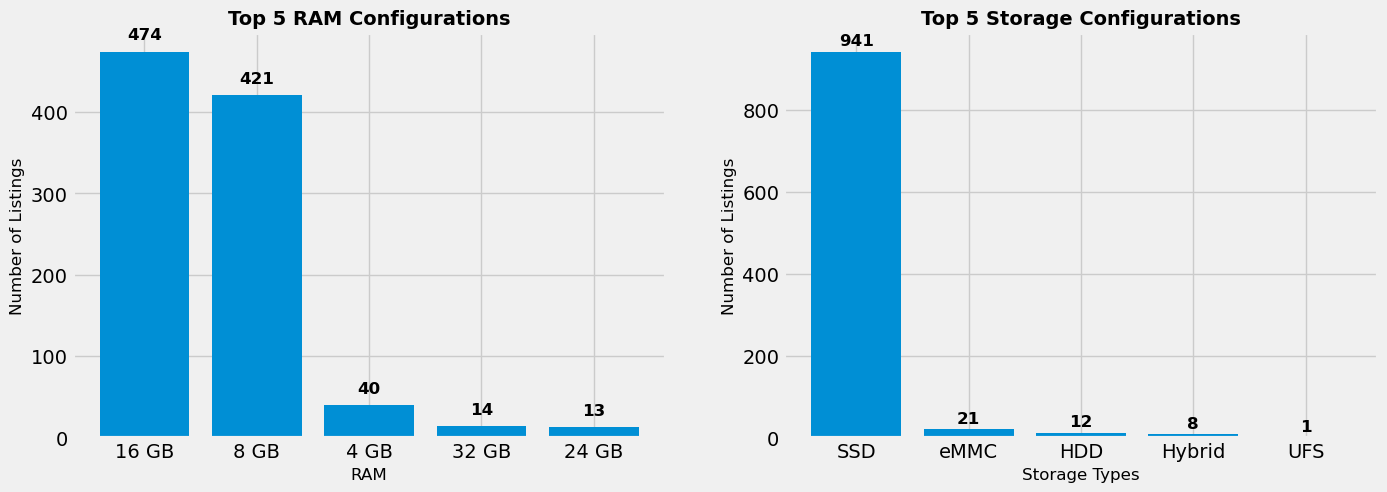

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bars = plt.bar(top_five_ram.index,top_five_ram.values)
plt.title('Top 5 RAM Configurations',fontsize=14, fontweight='bold')
plt.ylabel('Number of Listings',fontsize=12)
plt.xlabel('RAM',fontsize=12)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,
             str(int(bar.get_height())), ha='center', fontsize=12, fontweight='bold')
plt.subplot(1,2,2)
bars = plt.bar(top_five_storage_type.index,top_five_storage_type.values)
plt.title('Top 5 Storage Configurations',fontsize=14, fontweight='bold')
plt.ylabel('Number of Listings',fontsize=12)
plt.xlabel('Storage Types',fontsize=12)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,  
             str(int(bar.get_height())), ha='center', fontsize=12, fontweight='bold')
plt.show()

**16GB and 8GB RAM dominate the market, making up the majority of listings.**
- 16GB RAM is the most common configuration, followed by 8GB RAM.
- Higher RAM options (32GB, 24GB, 4GB) are significantly less frequent.
- This suggests that mid-range performance laptops are more readily available than high-end or budget models.

**SSD is the most common storage type, making up almost all listings.**
- 941 out of 983 laptops use SSD, making it the industry standard for storage.
- Other storage types (eMMC, HDD, Hybrid, UFS) have very few listings, indicating they are either outdated or niche choices.
- Traditional HDDs are rarely used, reinforcing the industry shift towards SSDs for speed and reliability.

**Conclusion**
- Modern laptops on Flipkart prioritize speed & efficiency, with SSD storage and at least 8GB RAM becoming the standard.
- Higher RAM configurations (32GB+) are rare, likely due to their higher cost and specialized use cases.

### What is the distribution of laptop screen sizes?

In [40]:
screen_size_counts = laptops["Screen_Size"].value_counts().sort_values(ascending=False).head(10)
screen_size_counts

Screen_Size
39.62 cm (15.6 inch)    575
35.56 cm (14 inch)      241
40.64 cm (16 inch)       72
34.54 cm (13.6 inch)     16
35.81 cm (14.1 inch)     15
29.46 cm (11.6 inch)     11
33.02 cm (13 inch)        9
38.86 cm (15.3 inch)      8
38.1 cm (15 inch)         7
33.78 cm (13.3 inch)      6
Name: count, dtype: int64

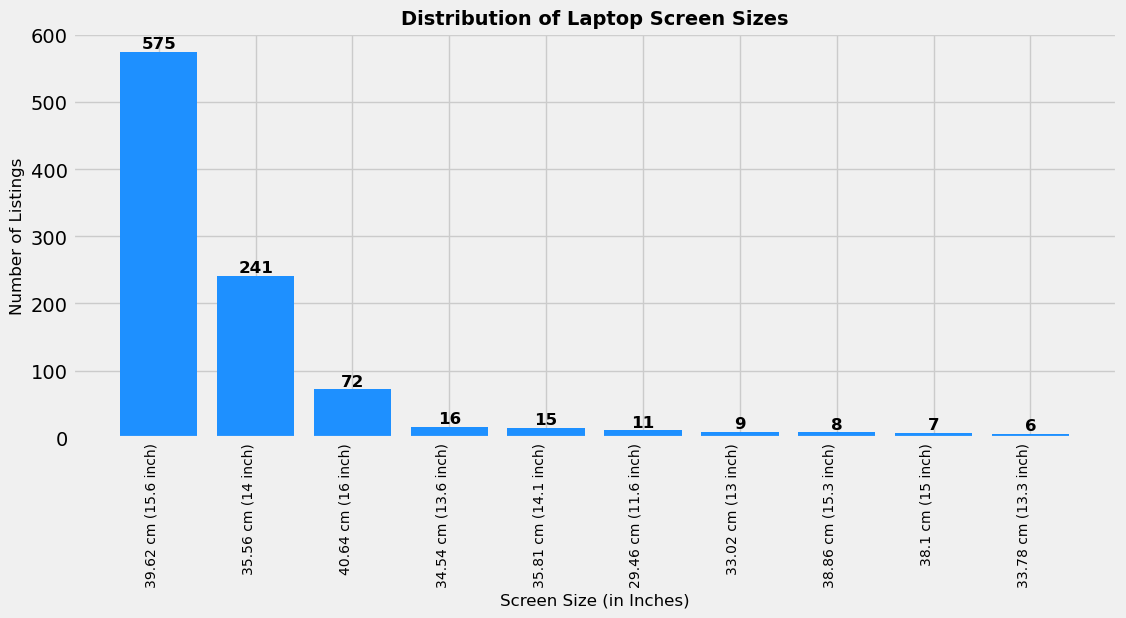

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))

bars = plt.bar(screen_size_counts.index, screen_size_counts.values, color='dodgerblue')

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(int(bar.get_height())), ha='center', fontsize=12, fontweight='bold')

plt.title("Distribution of Laptop Screen Sizes", fontsize=14, fontweight='bold')
plt.xlabel("Screen Size (in Inches)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.show()

- 15.6-inch and 14-inch laptops dominate the listings, making up the majority of available options.
- Smaller screen sizes (13-inch and below) are relatively rare, indicating less demand or availability for compact laptops.

## Pricing & Affordability

### What is the average selling price of laptops on Flipkart?

In [42]:
laptops[laptops['Final_price']==0]
# These are the laptops which were unavailable at the time the data was scraped. Hence exluding these.

,Model_Name,Type,Processor_Brand,Processor_Name,Processor_Generation,RAM,RAM_Type,Storage_Type,Graphic_Processor,Screen_Size,...,Warranty_Summary,Laptop_Name,Rating,Final_price,MRP,Discount,Product_URL,Ratings_count,Reviews_count,Brand_Name
301,15IAH8,Thin and Light Laptop,Intel,Core i5,12th Gen,16 GB,LPDDR5,SSD,Intel Integrated UHD,39.62 cm (15.6 inch),...,1 Year Carry-in Warranty,Lenovo MSO'2024 Intel Core i5 12th Gen 12450H ...,3.0,0,0,0.0,https://www.flipkart.com/lenovo-mso-2024-intel...,0,0,Lenovo
961,V 1 4,Thin and Light Laptop,Intel,Core i3,12th Gen,16 GB,DDR4,SSD,Intel Integrated UHD Graphics,35.56 cm (14 inch),...,1 Year Accidentaly Damage Protection + Onsite,Lenovo V 14 (2025) Intel Core i3 12th Gen 1215...,4.2,0,0,0.0,https://www.flipkart.com/lenovo-v-14-2025-inte...,0,0,Lenovo


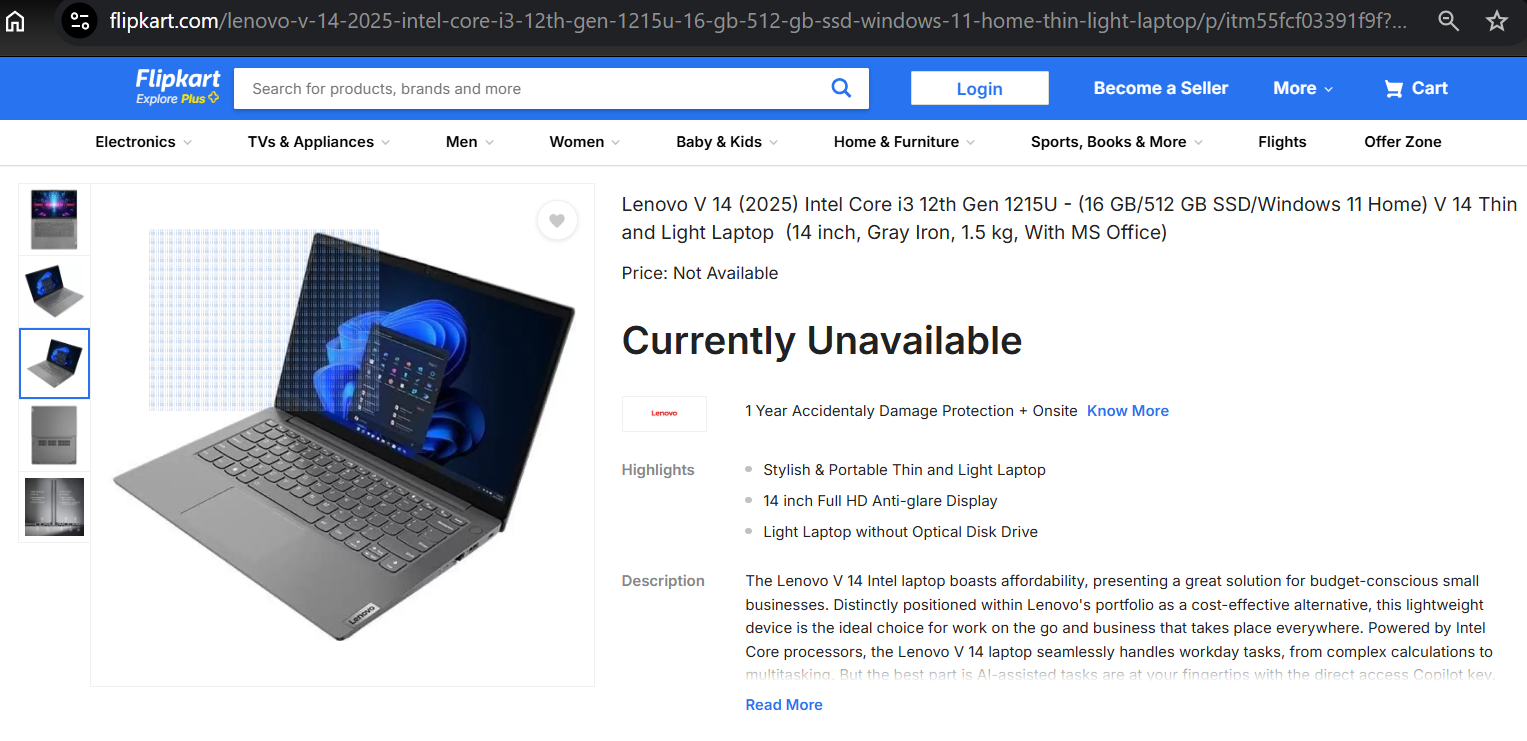

In [43]:
df = laptops[laptops['Final_price']!=0]

In [44]:
avg_price = df['Final_price'].mean()
print(f"The average selling price of laptops on Flipkart is ₹{avg_price:.2f}")

The average selling price of laptops on Flipkart is ₹61565.78


### Which brands have the most expensive & cheapest laptops?

In [45]:
brand_avg_price  = df.groupby(by='Brand_Name')['Final_price'].mean().sort_values()
cheapest_brands  = brand_avg_price.head(5)
expensive_brands = brand_avg_price.tail(5)

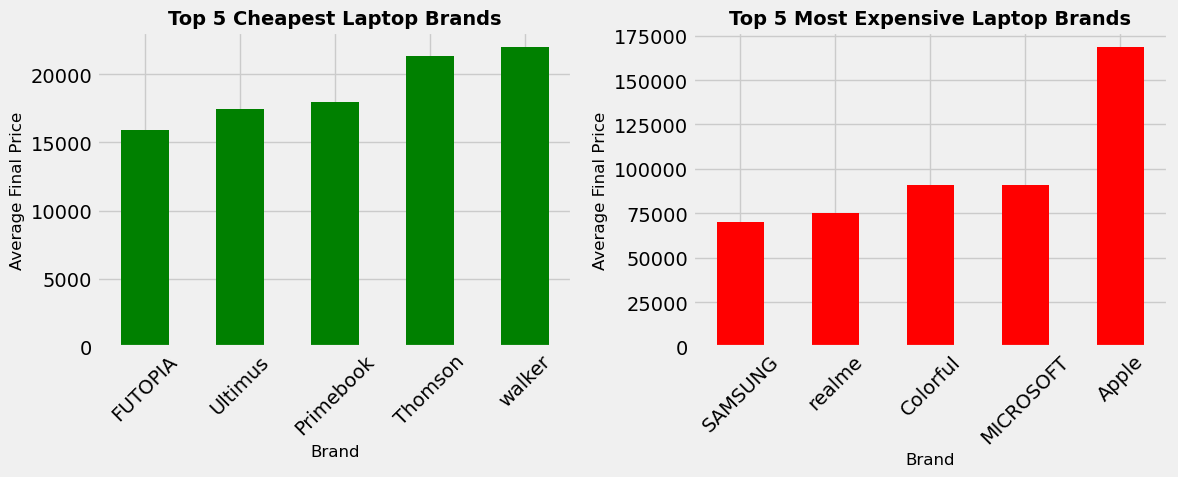

In [46]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
# Plot cheapest brands
plt.subplot(1, 2, 1)
cheapest_brands.plot(kind='bar', color='green')
plt.title("Top 5 Cheapest Laptop Brands", fontsize=14, fontweight='bold')
plt.ylabel("Average Final Price", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.xticks(rotation=45)

# Plot most expensive brands
plt.subplot(1, 2, 2)
expensive_brands.plot(kind='bar', color='red')
plt.title("Top 5 Most Expensive Laptop Brands", fontsize=14, fontweight='bold')
plt.ylabel("Average Final Price", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Apple has the highest average laptop price, followed by Microsoft, Colorful, and Realme.
- FUTOPIA, Ultimus, and Primebook offer the most budget-friendly laptops.
- Premium brands tend to focus on high-performance specs, while budget brands cater to affordability.

### How does price vary based on RAM size?

In [47]:
ram_price = df.groupby('RAM')['Final_price'].mean().sort_values()

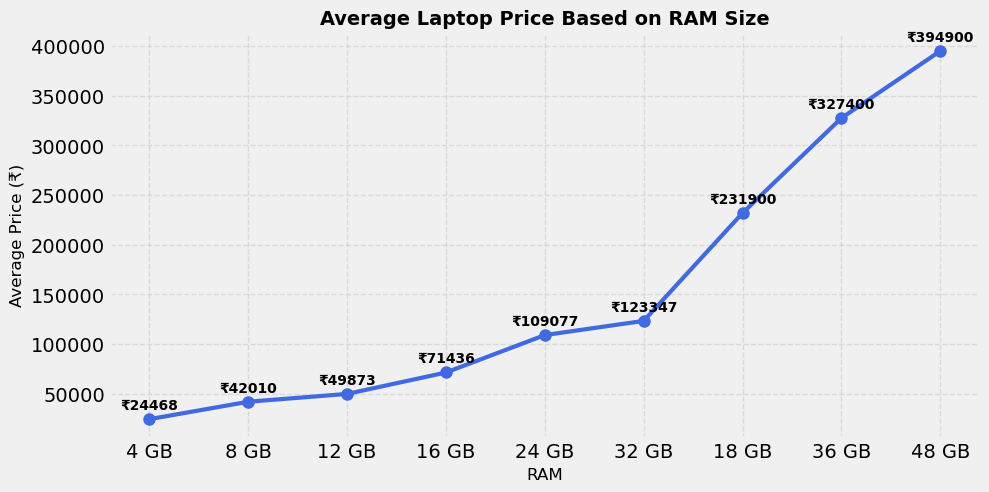

In [48]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.plot(ram_price, marker="o", lw=3, color="royalblue", markersize=8)

# Add values at each point
for i, price in enumerate(ram_price.values):
    plt.text(ram_price.index[i], price + 10000, f"₹{int(price)}", ha="center", fontsize=10, fontweight="bold")

plt.title("Average Laptop Price Based on RAM Size", fontsize=14, fontweight="bold")
plt.xlabel("RAM", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


- Higher RAM generally leads to higher prices, with a steep increase beyond 16GB.
- Budget laptops with 4GB and 8GB RAM are the most affordable, averaging ₹24,468 and ₹42,010.
- Premium laptops with 32GB+ RAM see exponential price growth, reaching nearly ₹4 lakh.
- The biggest jump occurs between 16GB and 24GB RAM, indicating a shift toward high-performance laptops.

### Is there a correlation between price & processor generation?

In [49]:
df['Processor_Generation'].unique()

array(['13th Gen', 'Unknown', '12th Gen', '14th Gen', '7th Gen',
       '11th Gen', '3rd Gen', '10th Gen', '4th Gen', '5th Gen', '8th Gen',
       '1st Gen'], dtype=object)

In [50]:
df = df[df['Processor_Generation']!='Unknown']
df['Processor_Generation'] = df['Processor_Generation'].str.extract(r'(\d+)').astype(int)
df = df.sort_values(by='Processor_Generation')

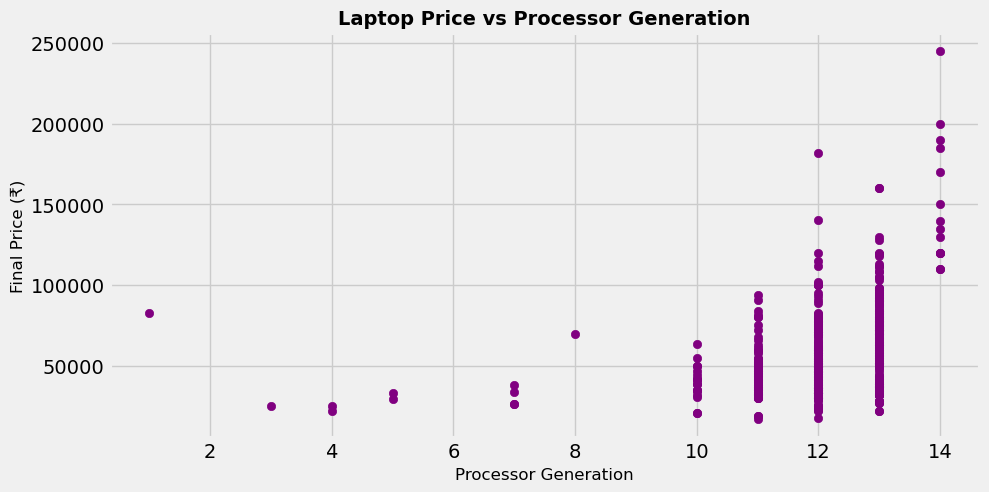

In [51]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.scatter(x= df['Processor_Generation'],y= df['Final_price'],color='purple')

plt.grid(True)
plt.title("Laptop Price vs Processor Generation", fontsize=14, fontweight='bold')
plt.xlabel("Processor Generation", fontsize=12)
plt.ylabel("Final Price (₹)", fontsize=12)
plt.show()

In [52]:
correlation = df[['Processor_Generation', 'Final_price']].corr().iloc[0,1]
print(f"Pearson Correlation between Processor Generation and Final Price: {correlation:.2f}")

Pearson Correlation between Processor Generation and Final Price: 0.36


- The Pearson correlation coefficient is 0.36, indicating a weak to moderate positive correlation between Processor Generation and Final Price.
- While newer processor generations tend to be priced higher, this relationship isn't very strong. Other factors like brand, RAM, storage, and GPU also influence laptop prices.
- Some older-generation processors may still be found in premium brands (e.g., Apple MacBooks or gaming laptops) that command high prices, reducing the strength of correlation.
- The scatter plot shows considerable variation, with some lower-generation processors still having high prices.

**Key Takeaways**
- Newer processor generations are generally more expensive, but exceptions exist.
- Other factors like brand, RAM, and GPU influence pricing significantly.
- Correlation is not strong enough to conclude that Processor Generation alone determines laptop prices.

## Performance & Specifications

### Which processor brand has the highest-rated laptops?

In [53]:
processor_rating = laptops.groupby(by='Processor_Brand')['Rating'].mean().sort_values(ascending=False)
highest_rated_brand = processor_rating.idxmax()
highest_rating = processor_rating.max()
print(f"The highest-rated processor brand is {highest_rated_brand} with an average rating of {highest_rating:.2f}")

The highest-rated processor brand is Apple with an average rating of 4.30


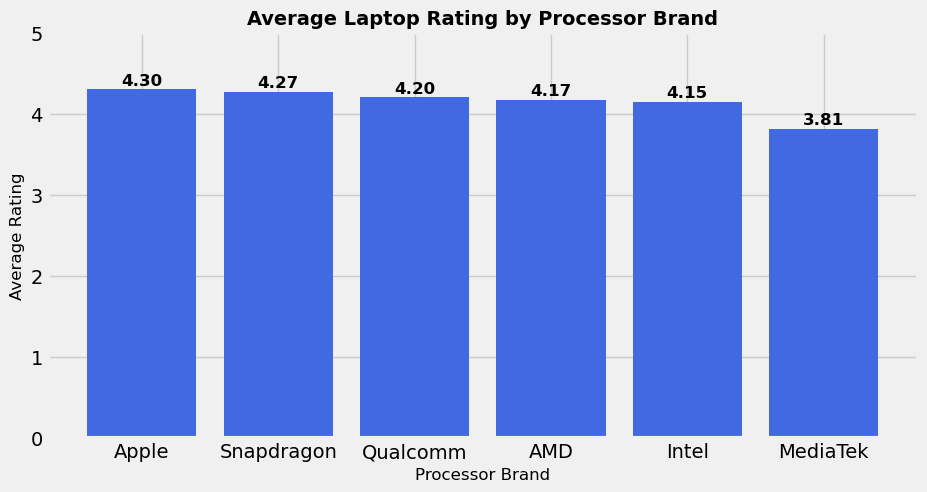

In [54]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 5))

bars = plt.bar(processor_rating.index, processor_rating.values, color="royalblue")

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f"{bar.get_height():.2f}", ha="center", fontsize=12, fontweight="bold")

plt.xlabel("Processor Brand", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Laptop Rating by Processor Brand", fontsize=14, fontweight="bold")
plt.ylim(0, 5)
plt.show()

- Apple has the highest-rated laptops, with an average rating of 4.30, followed by Snapdragon (4.27) and Qualcomm (4.20).
- AMD (4.17) and Intel (4.15) are closely competing, showing a marginal difference in user preference.
- MediaTek has the lowest average rating (3.81), indicating that its laptops might be perceived as lower quality or targeted toward budget users.
- Ratings suggest that Apple laptops are the most favored by users.

### What are the most common laptop weights?

In [55]:
weight_counts = laptops['Weight'].value_counts().sort_values(ascending=False).head(10)

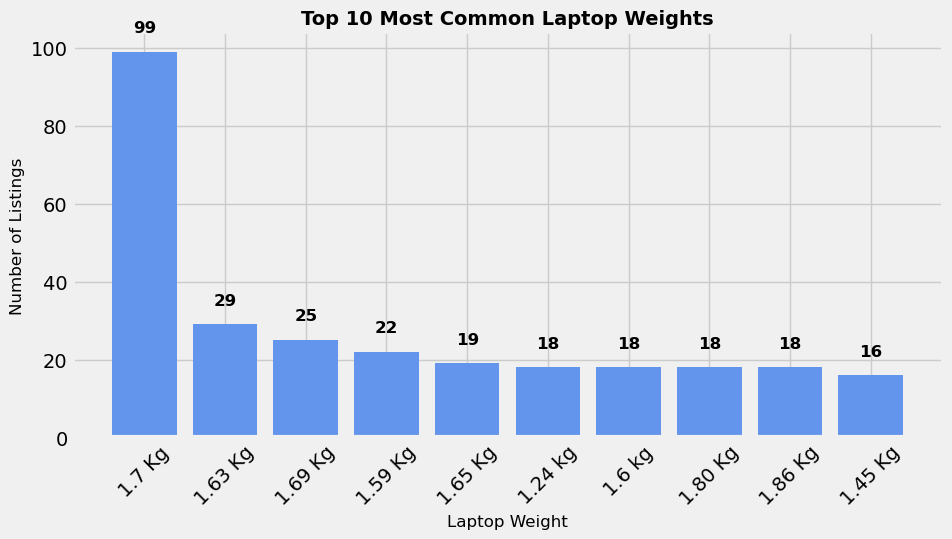

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
bars = plt.bar(weight_counts.index, weight_counts.values, color='cornflowerblue')

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(int(bar.get_height())), ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Laptop Weight", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Top 10 Most Common Laptop Weights", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

- The most common laptop weight in our dataset is 1.7 kg, appearing in 99 listings.
- Other frequently listed weights range between 1.45 kg to 1.86 kg, with most laptops weighing around 1.6 - 1.8 kg. This suggests that manufacturers tend to maintain a balance between portability and performance, with lightweight laptops (<1.5 kg) being less common.

### What is the distribution of laptops with backlit keyboards?

In [64]:
laptops['Backlit_Keyboard'] = laptops['Backlit_Keyboard'].replace('Unknown', np.nan)
backlit_counts = laptops['Backlit_Keyboard'].value_counts()
backlit_counts

Backlit_Keyboard
Yes    323
No     212
Name: count, dtype: int64

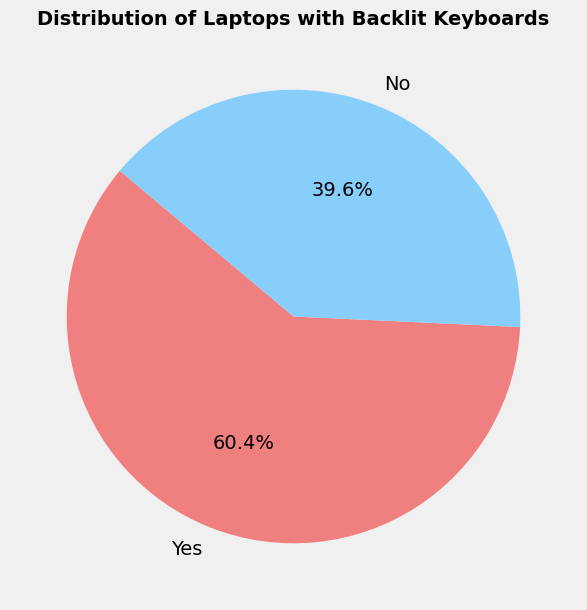

In [68]:
plt.figure(figsize=(7, 7))
plt.pie(backlit_counts, labels=backlit_counts.index,autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title("Distribution of Laptops with Backlit Keyboards", fontsize=14, fontweight='bold')
plt.show()

## Customer Ratings & Reviews

### Which laptops have the highest & lowest ratings?

In [83]:
df = laptops[laptops['Model_Name']!='Unknown']

In [84]:
highest_rated = df.nlargest(5, 'Rating')[['Model_Name', 'Rating']]
lowest_rated = df.nsmallest(5, 'Rating')[['Model_Name', 'Rating']]

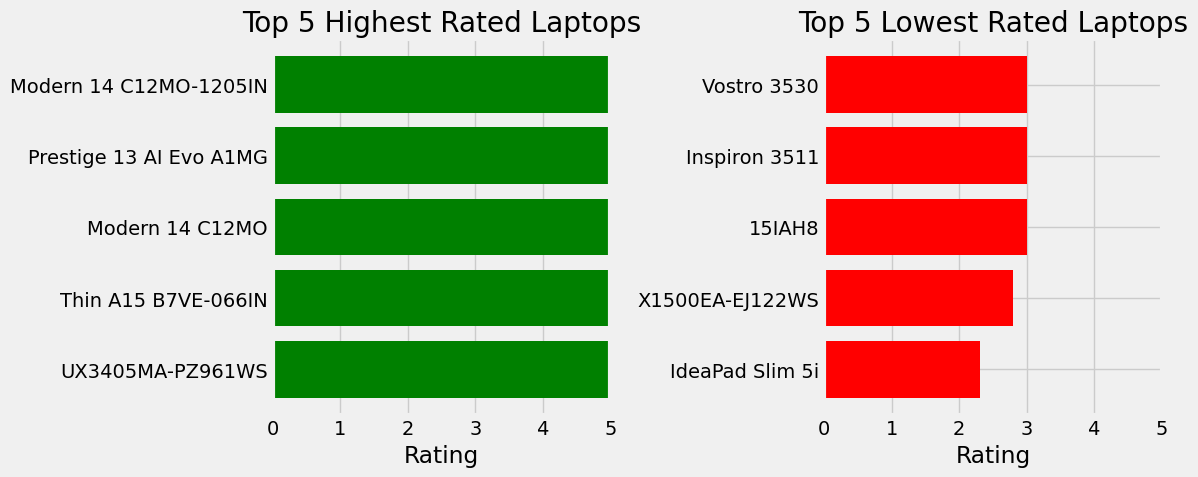

In [85]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(highest_rated['Model_Name'], highest_rated['Rating'], color='green')
plt.xlabel("Rating")
plt.title("Top 5 Highest Rated Laptops")
plt.xlim(0, 5)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(lowest_rated['Model_Name'], lowest_rated['Rating'], color='red')
plt.xlabel("Rating")
plt.title("Top 5 Lowest Rated Laptops")
plt.xlim(0, 5)

plt.tight_layout()
plt.show()

- Modern 14 C12MO and UX3405MA-PZ961WS are among the highest-rated laptops, scoring close to 5 stars.
- Laptops with strong ratings tend to belong to popular brands like MacBook Pro and Inspiron.
- The lowest-rated laptops have ratings around 3 stars or below, possibly due to performance issues, build quality, or customer dissatisfaction.

### How do the number of reviews correlate with laptop price?

In [90]:
correlation = df[['Reviews_count', 'Final_price']].corr().iloc[0,1]
print(f"Pearson Correlation between Number of Reviews and Final Price: {correlation:.2f}")

Pearson Correlation between Number of Reviews and Final Price: -0.18


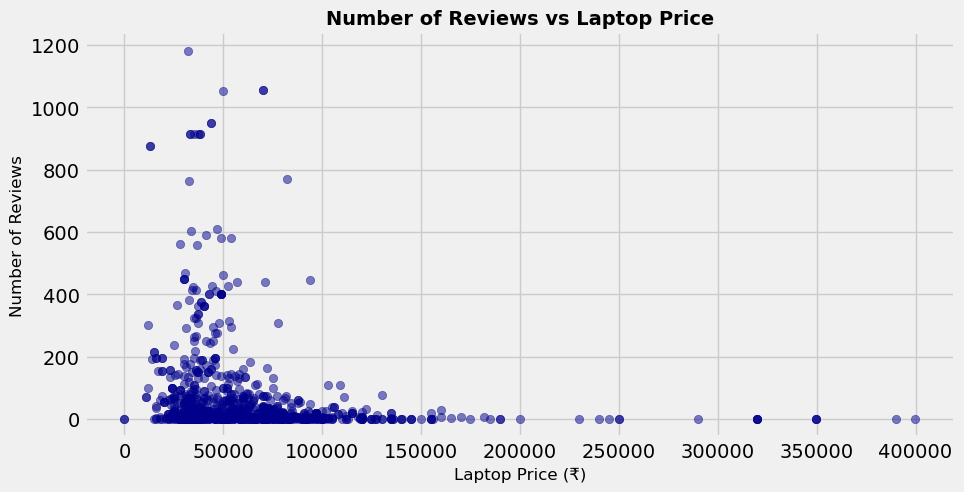

In [94]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.scatter(df['Final_price'], df['Reviews_count'], color='darkblue', alpha=0.5)

plt.xlabel("Laptop Price (₹)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Number of Reviews vs Laptop Price", fontsize=14, fontweight='bold')

plt.show()

- Weak negative correlation (-0.18) suggests that cheaper laptops get more reviews, while expensive ones get fewer.
- Budget laptops (₹0-50,000) have high review counts, whereas premium laptops (₹1,50,000+) have fewer reviews.
- Some exceptions exist—high-end brands like MacBooks and gaming laptops may still get significant reviews.
- Price isn’t the only factor—brand reputation, marketing, and demand also influence reviews.

**Key Takeaways**
- Affordable laptops attract more buyers → more reviews.
- Expensive laptops cater to a niche → fewer but detailed reviews.

## Final Insights & Trends

### What are the top-selling budget-friendly laptops?

In [104]:
# Define the budget threshold as the 25th percentile of the Final Price
# This helps in identifying the "budget" category by selecting the lower 25% of laptops in terms of price.
budget_threshold = laptops['Final_price'].quantile(0.25)

# Filter laptops that fall within the budget category (priced below or equal to the threshold)
budget_laptops = df[df['Final_price'] <= budget_threshold]

# Select the top 5 best-selling budget laptops based on the highest number of reviews
# We use 'nlargest' to get the top 5 laptops with the most customer reviews.
top_selling_budget = budget_laptops.nlargest(5, 'Reviews_count')[['Model_Name', 'Final_price', 'Reviews_count','Brand_Name']]

# Display the final DataFrame containing the top 5 budget-friendly laptops with the highest customer reviews
top_selling_budget

,Model_Name,Final_price,Reviews_count,Brand_Name
668,X515JA-BQ322WS,31990,1181,ASUS
8,X1504ZA-NJ322WS,32990,913,ASUS
27,Vivobook 15,32990,913,ASUS
507,X1502ZA-EJ953WS,34990,913,ASUS
42,Primebook 4G,12990,875,Primebook


- ASUS dominates the budget-friendly category, with 4 out of the 5 top-selling laptops.
- Primebook 4G is the most affordable in this list at ₹12,990.
- The highest-selling budget laptop is ASUS X515JA-BQ322WS, with 1,181 reviews.
- Most budget laptops are priced between ₹30,000 – ₹35,000.
- High review counts suggest these models are popular and well-received in the budget segment.

### What features are common in highly-rated laptops?

In [120]:
highly_rated = laptops[laptops['Rating']>=4.5]

In [123]:
# Count occurrences of each feature in highly-rated laptops
processor_count = highly_rated['Processor_Brand'].value_counts()
ram_count = highly_rated['RAM'].value_counts()
storage_count = highly_rated['Storage_Type'].value_counts()
screen_size_count = highly_rated['Screen_Size'].value_counts()
battery_backup_count = highly_rated['Battery_Backup'].value_counts().head()
weight_count = highly_rated['Weight'].value_counts().head()
backlit_keyboard_count = highly_rated['Backlit_Keyboard'].value_counts()

In [124]:
print("Processor Brand Distribution in Highly-Rated Laptops:\n", processor_count)

Processor Brand Distribution in Highly-Rated Laptops:
 Processor_Brand
Intel    68
AMD      24
Apple    24
Name: count, dtype: int64


In [127]:
print("RAM Distribution in Highly-Rated Laptops:\n", ram_count)

RAM Distribution in Highly-Rated Laptops:
 RAM
16 GB    68
8 GB     37
24 GB     4
32 GB     3
18 GB     3
4 GB      1
Name: count, dtype: int64


In [128]:
print("Storage Type Distribution in Highly-Rated Laptops:\n", storage_count)

Storage Type Distribution in Highly-Rated Laptops:
 Storage_Type
SSD    116
Name: count, dtype: int64


In [129]:
print("Screen Size Distribution in Highly-Rated Laptops:\n", screen_size_count)

Screen Size Distribution in Highly-Rated Laptops:
 Screen_Size
39.62 cm (15.6 inch)    53
35.56 cm (14 inch)      27
40.64 cm (16 inch)      11
33.02 cm (13 inch)       7
34.54 cm (13.6 inch)     6
38.1 cm (15 inch)        6
33.78 cm (13.3 inch)     2
22.35 cm (8.8 inch)      1
35.81 cm (14.1 inch)     1
31.5 cm (12.4 inch)      1
40.89 cm (16.1 inch)     1
Name: count, dtype: int64


In [130]:
print("Battery Backup Distribution in Highly-Rated Laptops:\n", battery_backup_count)

Battery Backup Distribution in Highly-Rated Laptops:
 Battery_Backup
Unknown          70
Upto 18 Hours    21
Upto 22 Hours     3
Upto 3 Hours      2
4 hours           2
Name: count, dtype: int64


In [131]:
print("Weight Distribution in Highly-Rated Laptops:\n", weight_count)

Weight Distribution in Highly-Rated Laptops:
 Weight
1.24 Kg    8
1.7 Kg     7
1.51 Kg    6
2.20 Kg    6
1.24 kg    5
Name: count, dtype: int64


In [132]:
print("Backlit Keyboard Presence in Highly-Rated Laptops:\n", backlit_keyboard_count)

Backlit Keyboard Presence in Highly-Rated Laptops:
 Backlit_Keyboard
Yes    47
No      6
Name: count, dtype: int64


- **Processor Preference**: The majority of highly-rated laptops use Intel (68 laptops) and AMD (24 laptops) processors, with Apple processors also receiving strong ratings.
- **RAM Configuration**: Most highly-rated laptops have 16GB RAM (68 laptops), followed by 8GB RAM (37 laptops), indicating a preference for higher memory capacity.
- **Storage Type**: All 116 highly-rated laptops use SSD storage, suggesting SSDs significantly contribute to user satisfaction.
- **Screen Size**: The most common screen sizes among highly-rated laptops are 15.6 inches (53 laptops) and 14 inches (27 laptops), making them popular choices for performance and portability.
- **Battery Backup**: Among laptops with known battery backup, the most common battery backup durations are:
    - Unknown values (70 laptops) - making analysis difficult.
    - Up to 18 hours (21 laptops) and Up to 22 hours (3 laptops), showing that longer battery life contributes to higher ratings.
- **Weight**: The most common weight categories for highly-rated laptops are 1.24 kg (8 laptops), 1.7 kg (7 laptops), and 1.51 kg (6 laptops), implying a preference for lightweight and portable devices.
- **Backlit Keyboard Presence**: A significant majority (47 out of 53 laptops) have backlit keyboards, showing that this feature enhances user experience and satisfaction.

**Conclusion**
- Highly-rated laptops tend to feature Intel or AMD processors, 16GB or 8GB RAM, SSD storage, 15.6-inch or 14-inch screens, long - battery life (often exceeding 10 hours), lightweight design, and backlit keyboards. These features likely contribute to their higher user satisfaction and ratings.